# Projeto Final
## Base de dados **Hotel Reservations**
- https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

#### Submissão: [Google-Forms](https://forms.gle/kKjVGvuboHb4LD4S9)
#### Prazo de envio: **09/12/2024**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Hotel-Reservations.csv')

## Exercício 1: Utilizando a função apply
Crie uma nova coluna chamada `stay_duration` a partir da soma de `no_of_weekend_nights` e `no_of_week_nights`.

In [3]:
average_price_per_room = df.groupby('room_type_reserved')['avg_price_per_room'].agg('mean')

average_price_per_room

room_type_reserved
Room_Type 1     95.918532
Room_Type 2     87.848555
Room_Type 3     73.678571
Room_Type 4    125.287317
Room_Type 5    123.733623
Room_Type 6    182.212836
Room_Type 7    155.198291
Name: avg_price_per_room, dtype: float64

In [4]:
df['avg_price_per_room_by_room_type'] = df.groupby('room_type_reserved')['avg_price_per_room'].transform('mean')

df['stay_duration'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,avg_price_per_room_by_room_type,stay_duration
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,95.918532,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,95.918532,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,95.918532,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,95.918532,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,95.918532,2


## Exercício 2: Utilizando a função transform
- Aplique a normalização (escalonamento entre 0 e 1) Min-Max na coluna `avg_price_per_room`.
- **Normalização Min-Max**:
$
x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$

### Onde:
- \( $x$ \): Valor original.
- \( $x'$ \): Valor normalizado (entre 0 e 1).
- \( $x_{\text{min}}$ \): Valor mínimo do conjunto de dados.
- \( $x_{\text{max}}$ \): Valor máximo do conjunto de dados.



In [5]:
if 'avg_price_per_room' in df.columns:
    df['normalized_avg_price_per_room'] = df['avg_price_per_room'].transform(
        lambda x: (x - df['avg_price_per_room'].min()) / (df['avg_price_per_room'].max() - df['avg_price_per_room'].min())
    )

In [6]:
df[['avg_price_per_room', 'normalized_avg_price_per_room']].head(10)

,avg_price_per_room,normalized_avg_price_per_room
0,65.00,0.120370
1,106.68,0.197556
2,60.00,0.111111
3,100.00,0.185185
4,94.50,0.175000
5,115.00,0.212963
6,107.55,0.199167
7,105.61,0.195574
8,96.90,0.179444
9,133.44,0.247111


## Exercício 3: Substituições com replace e regex
Altere a coluna `room_type_reserved` extraindo apenas os números da coluna.

In [7]:

if 'room_type_reserved' in df.columns:
    df['room_type_reserved'] = df['room_type_reserved'].replace(r'\D', '', regex=True)


In [8]:
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,avg_price_per_room_by_room_type,stay_duration,normalized_avg_price_per_room
0,INN00001,2,0,1,2,Meal Plan 1,0,1,224,2017,...,Offline,0,0,0,65.00,0,Not_Canceled,95.918532,3,0.120370
1,INN00002,2,0,2,3,Not Selected,0,1,5,2018,...,Online,0,0,0,106.68,1,Not_Canceled,95.918532,5,0.197556
2,INN00003,1,0,2,1,Meal Plan 1,0,1,1,2018,...,Online,0,0,0,60.00,0,Canceled,95.918532,3,0.111111
3,INN00004,2,0,0,2,Meal Plan 1,0,1,211,2018,...,Online,0,0,0,100.00,0,Canceled,95.918532,2,0.185185
4,INN00005,2,0,1,1,Not Selected,0,1,48,2018,...,Online,0,0,0,94.50,0,Canceled,95.918532,2,0.175000


## Exercício 4: Gráfico Mapa de Calor

Faça a plotagem do Mapa de calor (**Heatmap**) entre as colunas numéricas

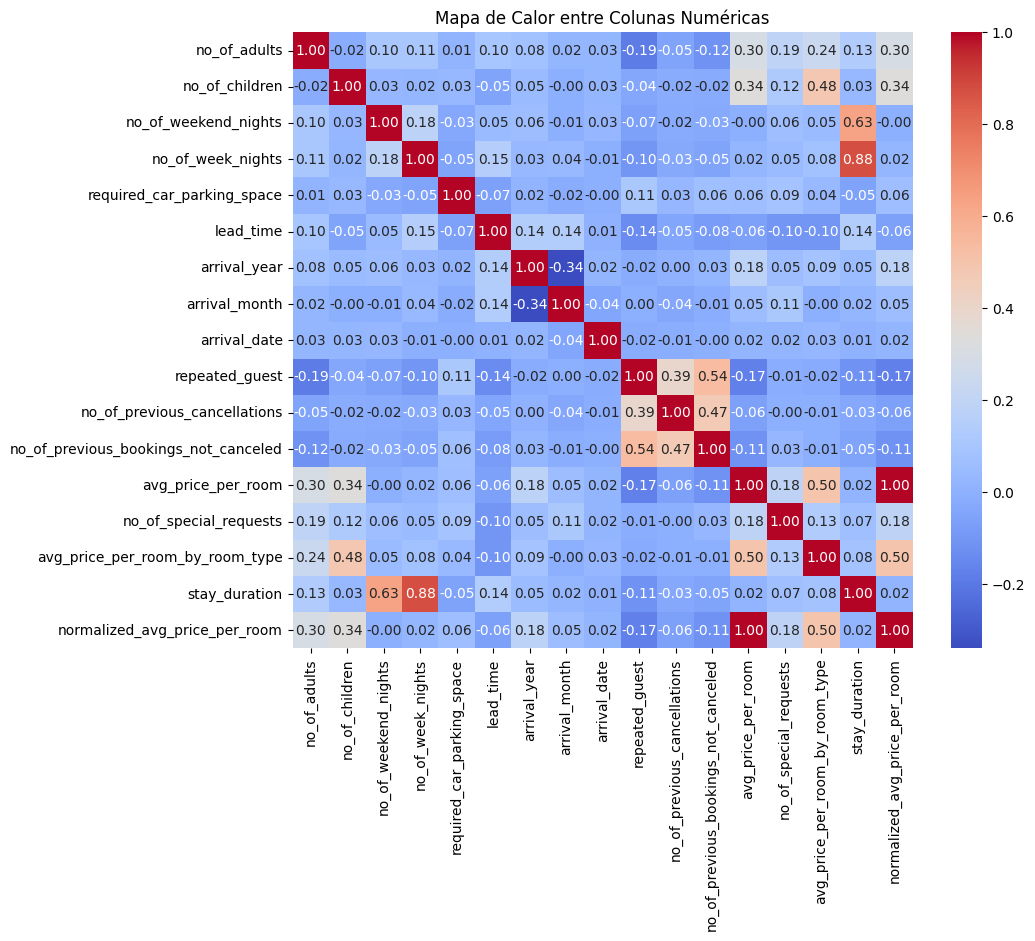

In [9]:
numeric_cols = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de Calor entre Colunas Numéricas')
plt.show()

## Exercício 5: Expressões Regulares
Altere a coluna `Booking_ID`, extraindo apenas os números da coluna.

In [10]:
if 'Booking_ID' in df.columns:
    df['Booking_ID'] = df['Booking_ID'].replace(r'\D', '', regex=True)

df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,avg_price_per_room_by_room_type,stay_duration,normalized_avg_price_per_room
0,00001,2,0,1,2,Meal Plan 1,0,1,224,2017,...,Offline,0,0,0,65.00,0,Not_Canceled,95.918532,3,0.120370
1,00002,2,0,2,3,Not Selected,0,1,5,2018,...,Online,0,0,0,106.68,1,Not_Canceled,95.918532,5,0.197556
2,00003,1,0,2,1,Meal Plan 1,0,1,1,2018,...,Online,0,0,0,60.00,0,Canceled,95.918532,3,0.111111
3,00004,2,0,0,2,Meal Plan 1,0,1,211,2018,...,Online,0,0,0,100.00,0,Canceled,95.918532,2,0.185185
4,00005,2,0,1,1,Not Selected,0,1,48,2018,...,Online,0,0,0,94.50,0,Canceled,95.918532,2,0.175000
5,00006,2,0,0,2,Meal Plan 2,0,1,346,2018,...,Online,0,0,0,115.00,1,Canceled,95.918532,2,0.212963
6,00007,2,0,1,3,Meal Plan 1,0,1,34,2017,...,Online,0,0,0,107.55,1,Not_Canceled,95.918532,4,0.199167
7,00008,2,0,1,3,Meal Plan 1,0,4,83,2018,...,Online,0,0,0,105.61,1,Not_Canceled,125.287317,4,0.195574
8,00009,3,0,0,4,Meal Plan 1,0,1,121,2018,...,Offline,0,0,0,96.90,1,Not_Canceled,95.918532,4,0.179444
9,00010,2,0,0,5,Meal Plan 1,0,4,44,2018,...,Online,0,0,0,133.44,3,Not_Canceled,125.287317,5,0.247111


## Exercício 6: Gráfico de Dispersão
Faça a plotagem com a relação entre `lead_time` e `avg_price_per_room` (sem a normalização).

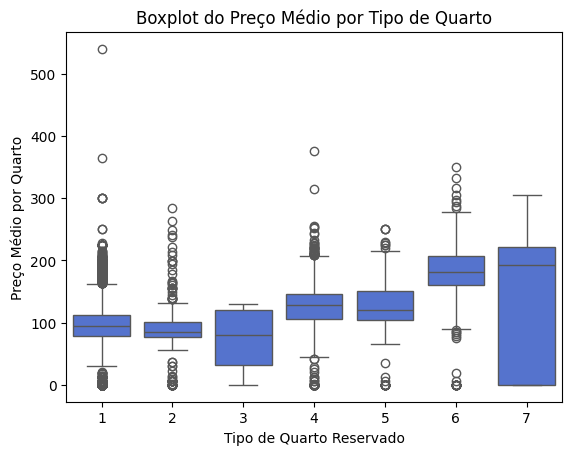

In [16]:
sns.boxplot(
    data=df,
    x='room_type_reserved',
    y='avg_price_per_room',
    order=['1', '2', '3', '4', '5', '6', '7'],
    color='royalblue'
)

plt.title('Boxplot do Preço Médio por Tipo de Quarto')
plt.xlabel('Tipo de Quarto Reservado')
plt.ylabel('Preço Médio por Quarto')
plt.show()

## Exercício 7: Groupby e Agg
Calcule o preço médio (`avg_price_per_room`), sem normalização, por tipo de quarto (`room_type_reserved`).

In [ ]:
average_price_per_room = df.groupby('room_type_reserved')['avg_price_per_room'].agg('mean')
df['avg_price_per_room_by_room_type'] = average_price_per_room



## Exercício 8: Boxplot
Apresente o boxplot com os dados de preço médio (`avg_price_per_room`), sem normalização, por tipo de quarto (`room_type_reserved`).

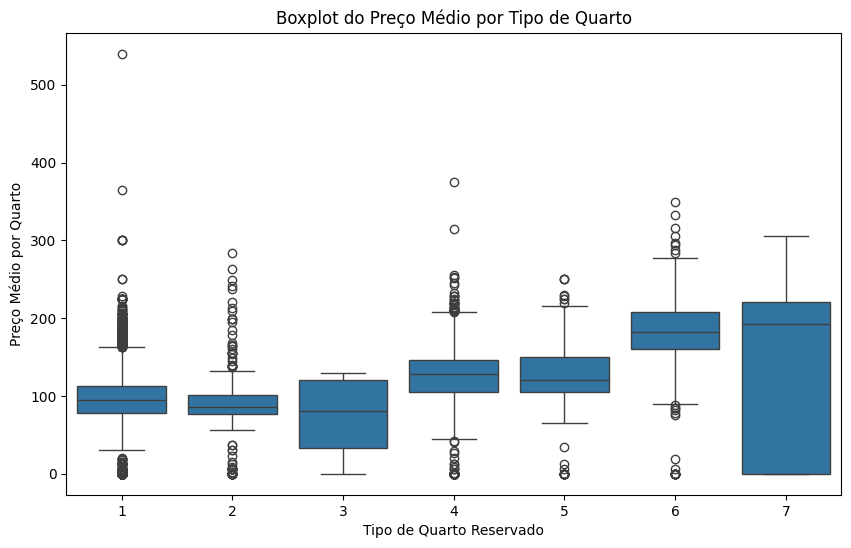

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type_reserved', y='avg_price_per_room', order=['1', '2', '3', '4', '5', '6','7'])
plt.title('Boxplot do Preço Médio por Tipo de Quarto')
plt.xlabel('Tipo de Quarto Reservado')
plt.ylabel('Preço Médio por Quarto')
plt.show()